In [1]:
import pandas as pd
from pandas import Series,DataFrame

In [2]:
Critics = pd.read_csv('Critics.csv', header = None, names = ["Author","Score","Date","Comment","Game"])
Critics["Type"] = "Expert"
Users = pd.read_csv('Users.csv', header = None, names = ["Author","Score","Date","Comment","Game"])
Users["Type"] = "User"
CriticsW = pd.read_csv('CriticsWon.csv', header = None, names = ["Author","Score","Date","Comment","Game"])
CriticsW["Type"] = "Expert"
UsersW = pd.read_csv('UsersWon.csv', header = None, names = ["Author","Score","Date","Comment","Game"])
UsersW["Type"] = "User"
CriticsJ = pd.read_csv('CriticsJ.csv', header = None, names = ["Author","Score","Date","Comment","Game"])
CriticsJ["Type"] = "Expert"
UsersJ = pd.read_csv('UsersJ.csv', header = None, names = ["Author","Score","Date","Comment","Game"])
UsersJ["Type"] = "User"


Full = pd.concat([Critics,Users,CriticsW,UsersW,CriticsJ,UsersJ])
gamelist = {"Overwatch":["A","FPS","H"],"Halo MCC":["A","FPS","H"],"Borderlands 2":["A","RPG","H"],"Saints Row 4":["A","AA","H"],
            "The division":["A","FPS","H"],"Bioshock":["A","FPS","H"],"God of War":["A","AA","H"],"Black Ops":["A","FPS","H"],
            "Destiny":["A","FPS","H"],"Zelda":["A","AA","H"],"Last of Us":["A","AA","H"],"Skyrim":["A","RPG","H"],"Oblivion":["A","RPG","H"],
            "Shadow of War":["A","AA","M"],"Dead Rising 4":["A","AA","M"],"Cuphead":["I","R+G","M"],"Overcooked":["I","Puz","M"],
            "Papers Please":["I","Puz","M"],"Just Cause":["A","AA","M"],"Burnout":["A","Rac","M"],"Dark Souls":["A","AA","M"],
            "Dishonored":["A","AA","M"],"Dying Light":["A","AA","M"],"Madden 19":["A","S","M"],"Sunset Overdrive":["A","AA","L"],
            "NHL 18":["A","S","L"],"Quantum Break":["A","FPS","L"],"Dead Island Riptide":["A","AA","L"],"No Mans Sky":["A","AA","L"],
            "Witness":["I","Puz","L"],"Firewatch":["I","Puz","L"],"ARMA":["I","FPS","L"],"Skylines":["I","Puz","L"],
            "Stardew Valley":["A","Puz","M"]}

In [3]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

def sentiment_scores(sentence):
    snt = analyser.polarity_scores(sentence)
    return snt["compound"]
def sentiment_rating(snt_score):
    if snt_score < -.1:
        return "Neg"
    elif snt_score > .1:
        return "Pos"
    else:
        return "Neu"
def developer(game):
    return gamelist[game][0]
def genre(game):
    return gamelist[game][1]
def tier(game):
    return gamelist[game][2]
def score_tier(s):
    if s >= 7 :
        return "Pos"
    elif s <= 3:
        return "Neg"
    else:
        return "Neu"
def score_change(s):
    if s < 11:
        return s*10
    else: return s

In [4]:
Full["SentScore"]= Full["Comment"].map(sentiment_scores)
Full["SentRate"]= Full["SentScore"].map(sentiment_rating)
Full["Developer"] = Full["Game"].map(developer)
Full["Genre"] = Full["Game"].map(genre)
Full["Tier"] = Full["Game"].map(tier)
Full["ScoreRating"] = Full["Score"].map(score_tier)
Full["Score"] = Full["Score"].map(score_change)

In [5]:
Full[Full["Type"]=="User"]["SentRate"].value_counts()

Pos    9114
Neg    2752
Neu    1326
Name: SentRate, dtype: int64

In [6]:
Full[Full["Type"]=="Expert"]["SentRate"].value_counts()

Pos    1377
Neg     254
Neu     134
Name: SentRate, dtype: int64

In [7]:
Full.groupby([Full["Game"],Full["Type"],Full["SentRate"]])["SentScore"].count()

Game              Type    SentRate
ARMA              Expert  Neg           4
                          Neu           7
                          Pos          30
                  User    Neg          59
                          Neu          37
                          Pos         165
Bioshock          Expert  Neg          15
                          Neu           5
                          Pos          48
                  User    Neg         166
                          Neu          64
                          Pos         857
Black Ops         Expert  Neg          17
                          Neu           7
                          Pos          66
                  User    Neg         181
                          Neu          73
                          Pos         322
Borderlands 2     Expert  Neg           3
                          Neu           3
                          Pos          35
                  User    Neg          75
                          Neu          36

In [8]:
for g in gamelist.keys():
    gamedf = Full[Full["Game"] == g]
    xscore = round(gamedf[gamedf["Type"] == "Expert"]["SentScore"].mean(),3)
    uscore = round(gamedf[gamedf["Type"] == "User"]["SentScore"].mean(),3)
    urating = round(gamedf[gamedf["Type"] == "User"]["Score"].mean(),3)
    xrating = round(gamedf[gamedf["Type"] == "Expert"]["Score"].mean(),3)
    diff = round(xscore-uscore,3)
    
    ratio = round(abs(xscore)/abs(uscore),3)
    print(g,xscore,uscore,ratio,xrating,urating,diff)

Overwatch 0.712 0.365 1.951 88.448 58.886 0.347
Halo MCC 0.503 0.383 1.313 82.889 71.77 0.12
Borderlands 2 0.627 0.546 1.148 86.927 79.314 0.081
Saints Row 4 0.373 0.424 0.88 83.917 70.964 -0.051
The division 0.431 0.199 2.166 76.806 55.736 0.232
Bioshock 0.368 0.519 0.709 93.515 80.028 -0.151
God of War 0.508 0.382 1.33 93.364 88.737 0.126
Black Ops 0.403 0.195 2.067 80.056 51.892 0.208
Destiny 0.678 0.249 2.723 84.388 49.226 0.429
Zelda 0.717 0.441 1.626 96.866 90.938 0.276
Last of Us 0.521 0.614 0.849 94.98 96.238 -0.093
Skyrim 0.51 0.324 1.574 92.314 57.125 0.186
Oblivion 0.461 0.477 0.966 83.333 77.568 -0.016
Shadow of War 0.366 0.006 61.0 65.75 33.196 0.36
Dead Rising 4 -0.24 -0.36 0.667 63.294 41.538 0.12
Cuphead 0.638 0.414 1.541 86.265 86.054 0.224
Overcooked 0.505 0.624 0.809 77.5 85.0 -0.119
Papers Please 0.386 0.525 0.735 83.233 82.948 -0.139
Just Cause 0.335 0.184 1.821 70.887 52.553 0.151
Burnout 0.692 0.715 0.968 79.976 79.6 -0.023
Dark Souls 0.339 0.383 0.885 86.877 88.

In [9]:
A = Full[Full["Developer"]=="A"]
I = Full[Full["Developer"]=="I"]
A["SentRate"].value_counts()
I["SentRate"].value_counts().plot(kind="bar")

In [10]:
cPsN = 0
cNsP = 0
for a in range(1,len(Full)):
    sent = Full.iloc[a][7]
    score = Full.iloc[a][11]
    if sent == "Pos" and score == "Neg":
        cPsN += 1
    elif sent == "Neg" and score == "Pos":
        cNsP += 1
cPsN,cNsP

(1012, 1367)

In [11]:
for g in gamelist.keys():
    gamedf = Full[Full["Game"] == g]
    xscore = round(gamedf[gamedf["Type"] == "Expert"]["SentScore"].mean(),3)
    uscore = round(gamedf[gamedf["Type"] == "User"]["SentScore"].mean(),3)
    urating = round(gamedf[gamedf["Type"] == "User"]["Score"].mean(),3)
    xrating = round(gamedf[gamedf["Type"] == "Expert"]["Score"].mean(),3)
    
    ratio = round(abs(xscore)/abs(uscore),3)
    print(g,xscore,uscore,ratio,xrating,urating)

Overwatch 0.712 0.365 1.951 88.448 588.858
Halo MCC 0.503 0.383 1.313 82.889 717.697
Borderlands 2 0.627 0.546 1.148 86.927 793.135
Saints Row 4 0.373 0.424 0.88 83.917 709.639
The division 0.431 0.199 2.166 76.806 557.362
Bioshock 0.368 0.519 0.709 93.515 800.276
God of War 0.508 0.382 1.33 93.364 887.374
Black Ops 0.403 0.195 2.067 80.056 518.924
Destiny 0.678 0.249 2.723 84.388 492.256
Zelda 0.717 0.441 1.626 96.866 909.375
Last of Us 0.521 0.614 0.849 94.98 962.375
Skyrim 0.51 0.324 1.574 92.314 571.25
Oblivion 0.461 0.477 0.966 83.333 775.676
Shadow of War 0.366 0.006 61.0 65.75 331.963
Dead Rising 4 -0.24 -0.36 0.667 63.294 415.385
Cuphead 0.638 0.414 1.541 86.265 860.541
Overcooked 0.505 0.624 0.809 77.5 850.0
Papers Please 0.386 0.525 0.735 83.233 829.482
Just Cause 0.335 0.184 1.821 70.887 525.532
Burnout 0.692 0.715 0.968 79.976 796.0
Dark Souls 0.339 0.383 0.885 86.877 885.926
Dishonored 0.442 0.483 0.915 87.969 799.528
Dying Light 0.358 0.42 0.852 75.361 824.638
Madden 19 0

In [12]:
Full["SentRate"].value_counts()

Pos    10491
Neg     3006
Neu     1460
Name: SentRate, dtype: int64

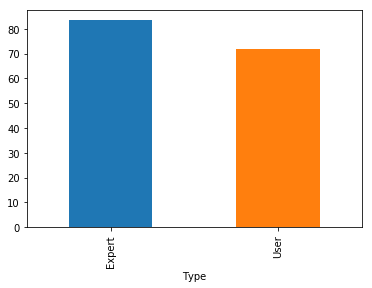

In [15]:
Series(Full.groupby(Full["Type"])["Score"].mean()).plot(kind="bar")

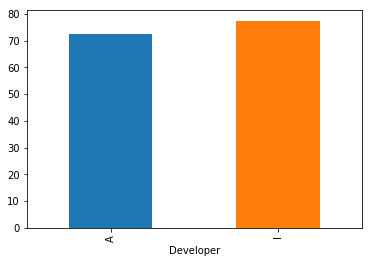

In [16]:
Series(Full.groupby(Full["Developer"])["Score"].mean()).plot(kind="bar")

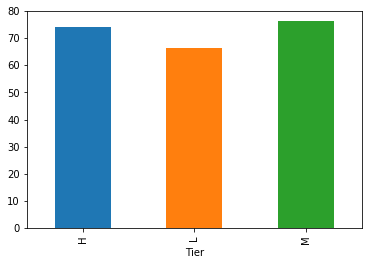

In [17]:
Series(Full.groupby(Full["Tier"])["Score"].mean()).plot(kind="bar")

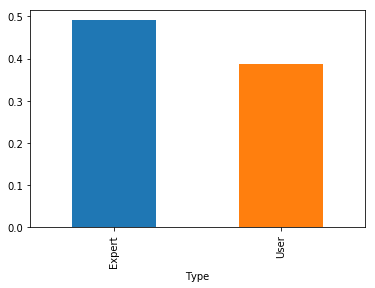

In [22]:
Series(Full.groupby(Full["Type"])["SentScore"].mean()).plot(kind="bar")

In [23]:
Full.groupby(Full["Type"])["SentScore"].mean()

Type
Expert    0.490882
User      0.386089
Name: SentScore, dtype: float64

In [24]:
Full.groupby(Full["Type"])["Score"].mean()

Type
Expert    83.428329
User      71.753335
Name: Score, dtype: float64